Write a program to detect a point and horizontal, vertical and diagonal lines in an
image.

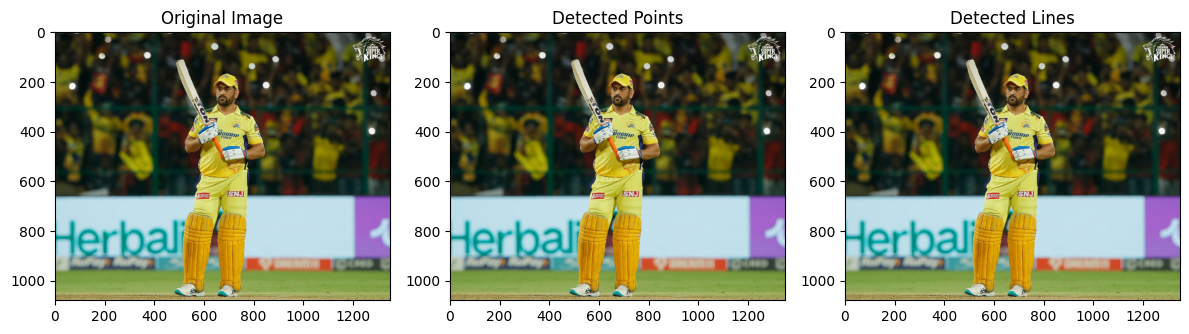

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def detect_points(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)
    
    for corner in corners:
        x, y = corner.ravel()
        cv2.circle(image, (int(x), int(y)), 3, 255, -1)

def detect_lines(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        cv2.line(image, (x1, y1), (x2, y2), 255, 2)

# Read the image
image_path = r'C:\Users\Suyash Tambe\Desktop\FIPL ESE\20230418_102332.jpg'
image = cv2.imread(image_path)

# Detect points
detect_points(image.copy())

# Detect horizontal, vertical, and diagonal lines
detect_lines(image.copy())

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB))
plt.title('Detected Points')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB))
plt.title('Detected Lines')

plt.tight_layout()
plt.show()
